In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
raw_data = '../data/raw'

In [4]:
!ls {raw_data}

googletrend.csv       state_names.csv       test.csv
rossmann.tgz          store.csv             train.csv
sample_submission.csv store_states.csv      weather.csv


In [5]:
import glob
from IPython.display import display
for file in glob.glob(f'{raw_data}/*.csv'):
  print(file)
  display(pd.read_csv(file, nrows=2))

../data/raw/state_names.csv


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY


../data/raw/googletrend.csv


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95


../data/raw/test.csv


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0


../data/raw/weather.csv


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31,12,4,39,26,58.0,5.08,6,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31,14,10,24,16,NaN,0.00,6,Rain,225


../data/raw/train.csv


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


../data/raw/store_states.csv


,Store,State
0,1,HE
1,2,TH


../data/raw/store.csv


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


../data/raw/sample_submission.csv


,Id,Sales
0,1,0
1,2,0


In [6]:
train_raw = pd.read_csv(f'{raw_data}/train.csv', low_memory=False)
train_raw.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
test_raw = pd.read_csv(f'{raw_data}/test.csv', low_memory=False)
test_raw.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


## Train: 2.5 yrs, test: 1.5 month

In [8]:
train_raw['Date'].min(), train_raw['Date'].max()

('2013-01-01', '2015-07-31')

In [9]:
test_raw['Date'].min(), test_raw['Date'].max()

('2015-08-01', '2015-09-17')

In [11]:
from matplotlib import pyplot
initial_date = pd.to_datetime( train_raw['Date'].min())
train_days_since = (pd.to_datetime(train_raw['Date']) -initial_date).dt.days
test_days_since = (pd.to_datetime(test_raw['Date']) - initial_date).dt.days
pyplot.boxplot([train_days_since, test_days_since], 0, 'rs', 0)
pyplot.show()

<Figure size 640x480 with 1 Axes>

## Train/test distributions are rather similar

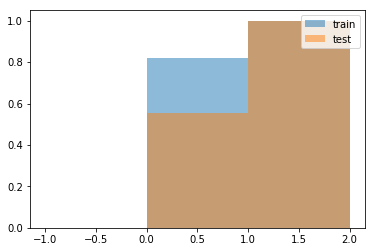

In [12]:
def cdf_compare(column):
    bins = np.linspace(test_raw[column].min()-1, test_raw[column].max() + 1, 100)
    pyplot.hist(train_raw[column], bins, alpha=0.5, label='train', cumulative=True, density=True)
    pyplot.hist(test_raw[column], bins, alpha=0.5, label='test', cumulative=True, density=True)
    pyplot.legend(loc='upper right')
    pyplot.show()

cdf_compare('SchoolHoliday')

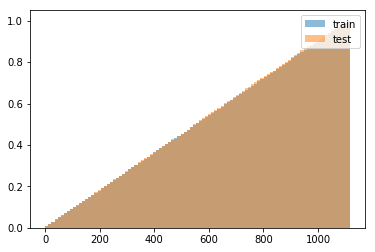

In [13]:
cdf_compare('Store')

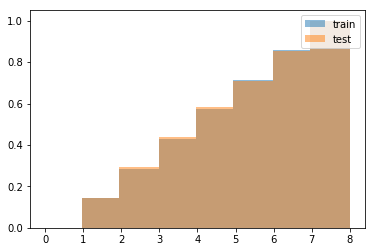

In [14]:
cdf_compare('DayOfWeek')

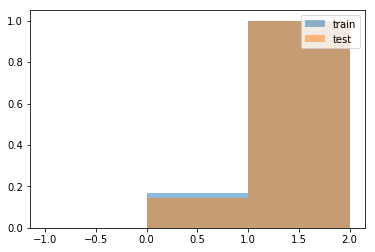

In [15]:
cdf_compare('Open')

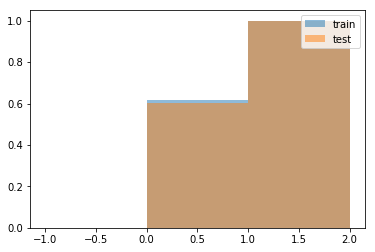

In [16]:
cdf_compare('Promo')